In [452]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')



train_unprocessed.head()

CPU times: total: 922 ms
Wall time: 969 ms


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [453]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the RMSE of this prediction on the training set (for future cases, we'll calculate separately Train RMSE and Cross-validation RMSE).

We'll save our intermediate results in DataFrame scores_df:

In [454]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train RMSE': [], 'Cross-val RMSE': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train RMSE'] = score_00
scores_df.loc[0, 'Cross-val RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [455]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values.

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function uses TimeSeriesSplit for cross-validation. 

We want such number of cross-validation splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

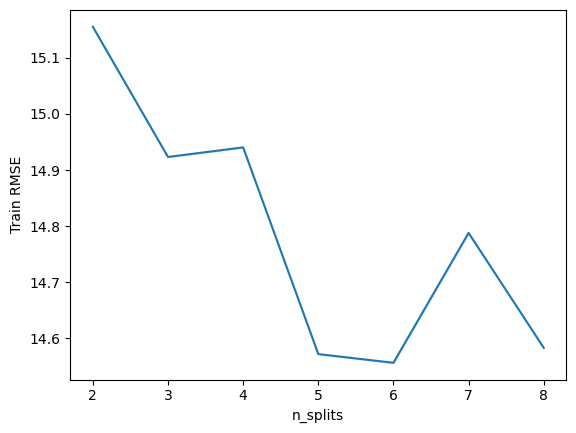

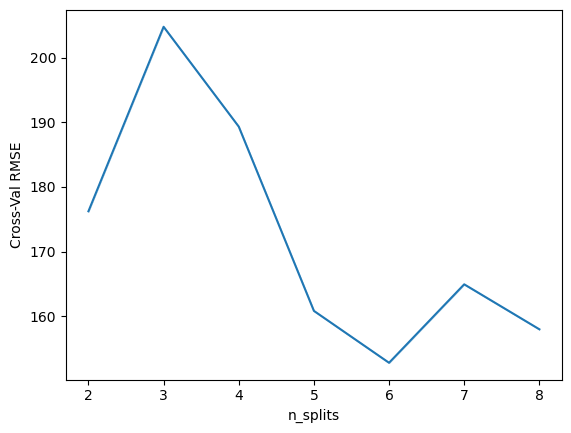

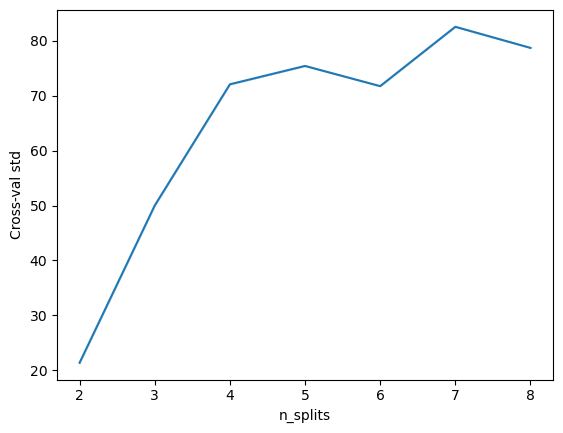

In [456]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val RMSE')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 6 splits, for a good balance between bias, variance and execution time:

In [457]:
N_SPLITS = 6
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [458]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_unprocessed,
                                                                   test_unprocessed,
                                                                   model, scores_df,
                                                        comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 53.4 s
Wall time: 5.58 s


In [459]:
scores_df.loc[int(study_number), 'Test RMSE'] = 47.78191
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191


## Date and WeekCount

Let's create time features, a date and a week count:

In [460]:
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

# Create a 'date' feature
train['date'] = pd.to_datetime(train_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(train_unprocessed.week_no.mul(7).astype(str) + ' days')
test['date'] = pd.to_datetime(test_unprocessed.year.astype(str), format='%Y') + \
                     pd.to_timedelta(test_unprocessed.week_no.mul(7).astype(str) + ' days')

# Create WeekCount feature
feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())



<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.000000
50%        183.000000
75%        195.000000
max        207.000000
Name: WeekCount, dtype: float64


## Location Types

Note, latitude and longitude do not fully make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [461]:
feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. Let's try to identify groups of locations with similar 'emission' patterns:

In [462]:
## Create a pivot table

location_table = pd.pivot_table(train, index='date', columns='Location', values='emission')

location_table.head()

Location,-0.5129.29,-0.52829.472,-0.54729.653,-0.56930.031,-0.59829.102,-0.60429.896,-0.61530.885,-0.62729.773,-0.63730.763,-0.65330.447,...,-3.09529.505,-3.09929.601,-3.13329.467,-3.13630.364,-3.13830.662,-3.15330.347,-3.16128.839,-3.17429.926,-3.28729.713,-3.29930.301
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.750994,3.857115,0.500023,100.382980,0.076542,64.49460,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.82686,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-08,4.025176,4.213432,0.529315,106.375980,0.081001,68.42294,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.35756,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-15,4.231381,4.451489,0.554183,110.766335,0.084788,71.01155,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.72222,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518
2019-01-22,4.305286,4.553981,0.561553,113.097940,0.085920,72.57178,88.741880,117.846870,43.542730,30.415354,...,5.422680,79.23992,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650
2019-01-29,4.347317,4.676066,0.559731,114.985886,0.085650,73.83461,91.137010,120.702270,43.739470,30.567698,...,5.316918,80.32427,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742


We'll create an elbow plot of explained variance by number of principal components:

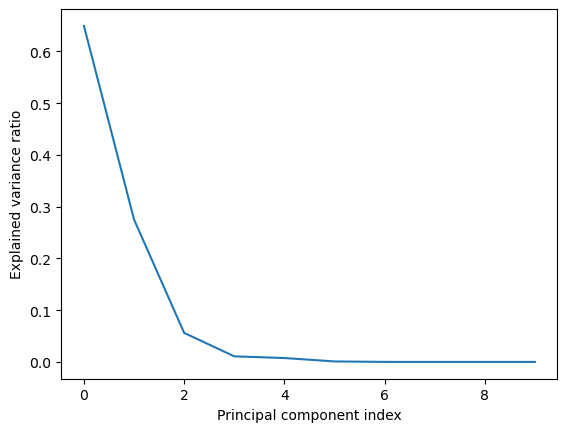

CPU times: total: 344 ms
Wall time: 171 ms


In [463]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

# Fit PCA
pca.fit(location_table)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

2 components explain most of the variance. Let's find the special locations:

In [464]:
%%time

# Recalculate PCA 
pca = PCA(n_components = 2)
pca.fit(location_table)

# Create importance dataframes
location_importances = pd.DataFrame(np.transpose(abs(pca.components_)), index = location_table.columns, columns=['PC1', "PC2"])


print('Locations sorted by PC1 imortance:')
location_importances.sort_values(by='PC1', ascending=False).head(10)

Locations sorted by PC1 imortance:
CPU times: total: 31.2 ms
Wall time: 15 ms


,PC1,PC2
Location,,
-2.07929.321,0.991361,0.088617
-2.37829.222,0.050352,0.164703
-1.34631.254,0.024180,0.048800
-1.51429.686,0.020555,0.189729
-1.31930.281,0.019428,0.149098
-2.33529.665,0.019208,0.137005
-2.15429.946,0.018832,0.142713
-0.95630.744,0.017227,0.044920
-1.88230.018,0.017226,0.120596


In [465]:
print('Locations sorted by PC2 imortance:')
location_importances.sort_values(by='PC2', ascending=False).head(10)

Locations sorted by PC2 imortance:


,PC1,PC2
Location,,
-1.51429.686,0.020555,0.189729
-2.59929.801,0.009692,0.184982
-2.37829.222,0.050352,0.164703
-1.48629.614,0.011875,0.160348
-2.29329.507,0.013203,0.160082
-2.37629.924,0.005365,0.150127
-1.31930.281,0.019428,0.149098
-2.15429.946,0.018832,0.142713
-2.33529.665,0.019208,0.137005


In [466]:
special_locations = location_importances.sort_values(by='PC1', ascending=False).index[:2].tolist()
    
special_locations

['-2.07929.321', '-2.37829.222']

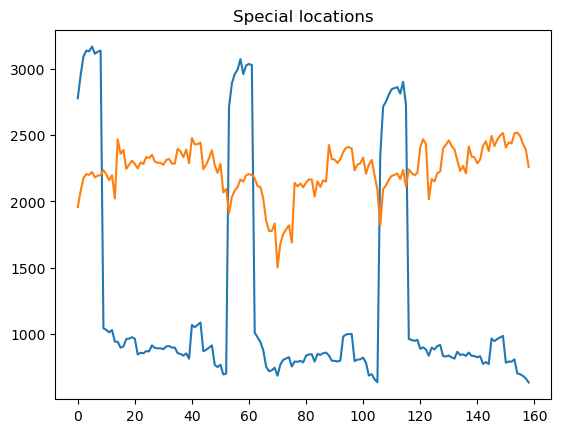

CPU times: total: 328 ms
Wall time: 169 ms


In [467]:
%%time


for location in special_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)
plt.title('Special locations')
plt.show()

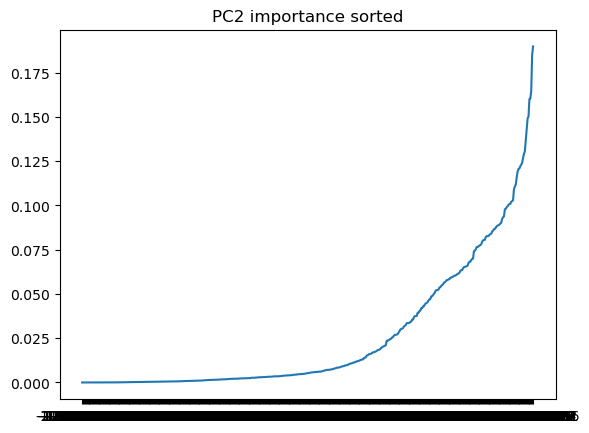

In [468]:
plt.plot(location_importances['PC2'].sort_values(ascending=True))
plt.title('PC2 importance sorted')
plt.show()

Playing with border_importane parameter we can separate the rest of locations in two distinct groups with common patterns:

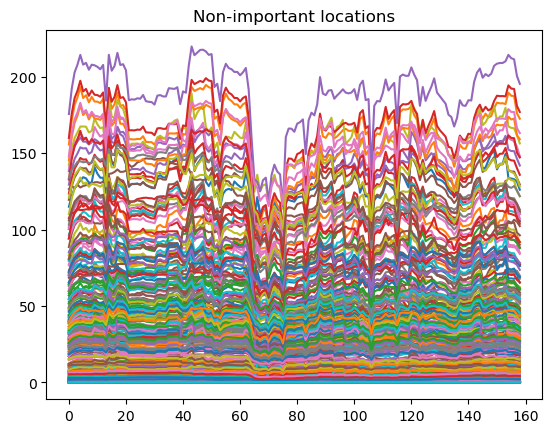

CPU times: total: 328 ms
Wall time: 409 ms


In [469]:
%%time

border_importance = location_importances['PC2'].quantile(0.65)

non_important_locations = location_importances.loc[location_importances['PC2'] < border_importance].index.to_list()
important_locations = location_importances.loc[location_importances['PC2'] >= border_importance].index.to_list()
important_locations = list(set(important_locations) - set(special_locations))
assert(len(non_important_locations) + len(important_locations) + len(special_locations) == len(location_table.columns))

for location in non_important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)  

plt.title('Non-important locations')
plt.show()

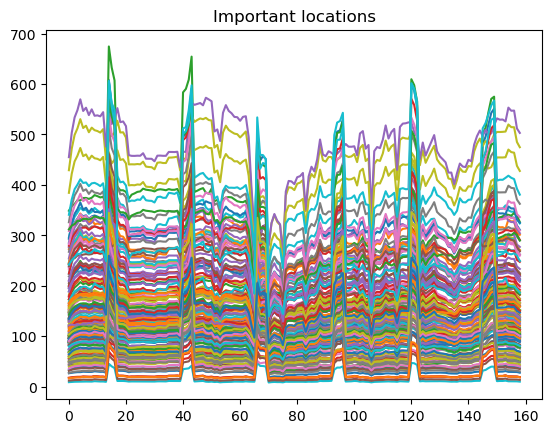

CPU times: total: 266 ms
Wall time: 319 ms


In [470]:
%%time

for location in important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)    
plt.title('Important locations')
plt.show()

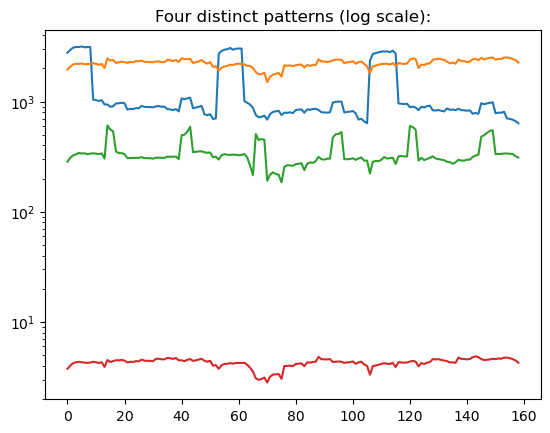

In [471]:
four_representatives = special_locations.copy()
four_representatives.append(important_locations[0])
four_representatives.append(non_important_locations[0])

fig, ax = plt.subplots()
for location in four_representatives:
    series = location_table[location]
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns (log scale):')
ax.set_yscale('log')
plt.show()

One of the special locations has a pattern similar to the patterns for the low emissions locations, but, since it has high emission, I will still explore it separately.

In [472]:
%%time

feature_name = 'Location_group'

location_importances[feature_name] = ['High' if location in important_locations else \
                           'Low' if location in non_important_locations else \
                          "Special 1" if location == special_locations[0] else \
                          "Special 2" if location == special_locations[1] else \
                          "ERROR" for location in location_importances.index]

for data in [train, test]:
    
    data[feature_name] = data["Location"].map(location_importances[feature_name])
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())


<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
None
count     79023
unique        4
top         Low
freq      51357
Name: Location_group, dtype: object
Unique Values and their count:
Low          51357
High         27348
Special 1      159
Special 2      159
Name: Location_group, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  object
dtypes: object(1)
memory usage: 380.5+ KB
None
count     24353
unique        4
top         Low
freq      15827
Name: Location_group, dtype: object
Unique Values and their count:
Low          15827
High          8428
Special 1       49
Special 2       49
Name: Location_group, dtype: int64
CPU time

## 02. Remove COVID period

As AmbrosM described, the emissions were affected by one-time event: the COVID pandemic.

My approach here will be to exclude the COVID drop period from the dataset.


First, let's find the dates of COVID pattern in the Low group:

<timed exec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator


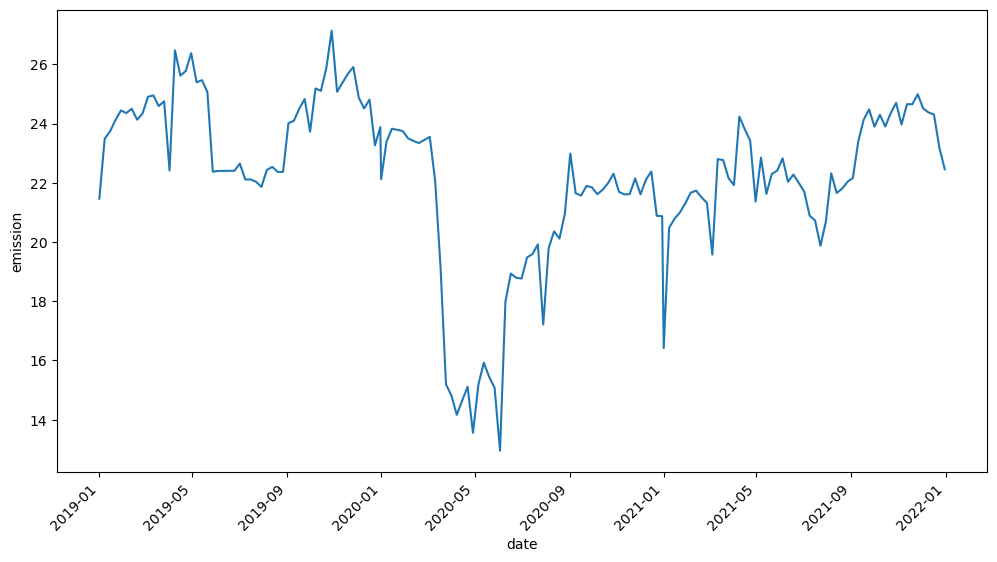

CPU times: total: 328 ms
Wall time: 356 ms


In [473]:
%%time

study_number = '02'

train_and_test = pd.concat([train, test])
train_and_test_low = train_and_test.loc[train_and_test["Location_group"] == 'Low']
train_and_test_low_by_date = train_and_test_low.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_low_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [474]:
print('Dates with lowest emissions:')
train_and_test_low_by_date['emission'].median().sort_values().head(35).sort_index()

Dates with lowest emissions:


date
2020-03-18    19.134401
2020-03-25    15.197190
2020-04-01    14.818518
2020-04-08    14.165483
2020-04-15    14.648009
2020-04-22    15.114670
2020-04-29    13.556390
2020-05-06    15.189357
2020-05-13    15.925202
2020-05-20    15.443724
2020-05-27    15.075055
2020-06-03    12.953855
2020-06-10    17.988222
2020-06-17    18.936085
2020-06-24    18.791813
2020-07-01    18.766336
2020-07-08    19.481113
2020-07-15    19.591595
2020-07-22    19.919827
2020-07-29    17.214808
2020-08-05    19.795933
2020-08-12    20.358725
2020-08-19    20.114641
2020-08-26    20.960009
2020-12-23    20.886156
2020-12-30    20.871677
2021-01-01    16.419092
2021-01-08    20.478285
2021-01-15    20.783508
2021-01-22    20.999780
2021-03-05    19.574919
2021-07-09    20.889560
2021-07-16    20.729810
2021-07-23    19.872679
2021-07-30    20.683060
Name: emission, dtype: float64

Here we can see that the drop started at 2020-03-18 and finished at 2020-08-26.

Now, let's look at the High group:

<timed exec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator


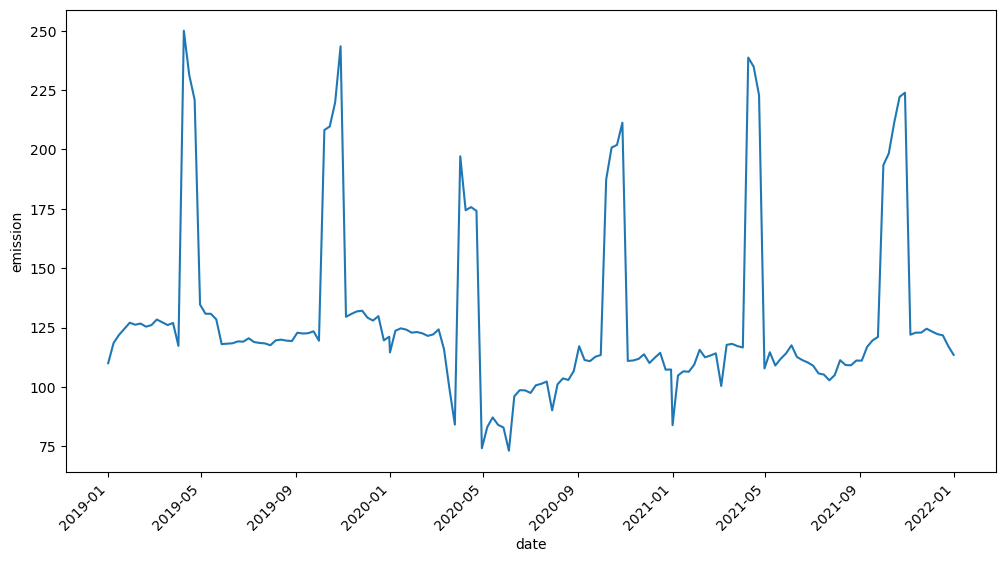

Dates with lowest emissions:
CPU times: total: 188 ms
Wall time: 244 ms


date
2020-03-18     99.259068
2020-03-25     84.085532
2020-04-29     74.142530
2020-05-06     83.065750
2020-05-13     87.126493
2020-05-20     84.002552
2020-05-27     82.864621
2020-06-03     73.098295
2020-06-10     96.012905
2020-06-17     98.596475
2020-06-24     98.524512
2020-07-01     97.441265
2020-07-08    100.681434
2020-07-15    101.294815
2020-07-22    102.242162
2020-07-29     90.091030
2020-08-05    101.072553
2020-08-12    103.565370
2020-08-19    102.905435
2020-08-26    106.650352
2020-12-23    107.233415
2020-12-30    107.319817
2021-01-01     83.852945
2021-01-08    104.786550
2021-01-15    106.572760
2021-01-22    106.352975
2021-03-05    100.367595
2021-04-30    107.747749
2021-05-14    108.997302
2021-07-02    108.945240
2021-07-09    105.672485
2021-07-16    105.171747
2021-07-23    102.764980
2021-07-30    104.959855
2021-08-20    109.085270
Name: emission, dtype: float64

In [475]:
%%time

train_and_test_high = train_and_test.loc[train_and_test["Location_group"] == 'High']
train_and_test_high_by_date = train_and_test_high.groupby('date')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = train_and_test_high_by_date['emission'].median(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

print('Dates with lowest emissions:')
train_and_test_high_by_date['emission'].median().sort_values().head(35).sort_index()



Same period. Let's exclude this period and look if this improves our scores. 

In [476]:
%%time

covid_start = pd.to_datetime('2020-03-18')
covid_finish = pd.to_datetime('2020-08-26')


train_no_covid = train.loc[(train['date'] < covid_start) | 
                                                (train['date'] > covid_finish)  , :]

train.to_csv('new_datasets/train_with_covid_1_{}.csv'.format(study_number))
train_no_covid.to_csv('new_datasets/train_no_covid_1_{}.csv'.format(study_number))

# Remove all new columns
selected_columns = list(set(test.columns) - {'date', 'WeekCount', 'Location', 'Location_group'})

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]


train_selected.to_csv('new_datasets/train_1_02.csv')
test_selected.to_csv('new_datasets/test_1_02.csv')


CPU times: total: 15.7 s
Wall time: 19.9 s


I recalculated the number of splits in ['functons/n_splits_2.py']('functons/n_splits_2.py') and found that 6 splits is still optimal for the truncated dataset.

In [477]:
%%time

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="No covid")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 53 s
Wall time: 8.02 s


In [478]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.00252
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802875,45.00252


Change in Cross-val score is not representative, since we have less data, so we'll consider improvement of Test RMSE as a good sign.

Next, let's try to introduce WeekCount:

## 03. WeekCount

In [479]:
%%time

study_number = '03'

selected_columns.append('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

train_score, cross_score, cross_scores_std, submission = \
                get_score(global_variables, train_selected, test_selected, model, scores_df,
                                        comment="+ WeekCount")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 57.6 s
Wall time: 12.7 s


In [480]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

,Comment,Train RMSE,Cross-val RMSE,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,15.784784,148.279326,47.78191
2,No covid,14.556626,152.802875,45.00252
3,+ WeekCount,14.413518,153.048045,NaN


We have a slight increase of RMSE, so we'll remove this feature.

In [481]:
selected_columns.remove('WeekCount')

train_selected = train_no_covid[selected_columns]
train_selected = pd.concat([train_selected, train_no_covid['emission']], axis=1)
test_selected = test[selected_columns]

## 04. Location_enc

We have 497 unique locations. We need to express Location as a numerical feature (or features). We'll create a feature Location_enc, using Mean Target Encoding, so locations with similar mean emissions (in the training set) will have similar Location_enc values.


In [482]:
study_number = '04'

# Change the datasets name to more convinient

no_covid_len = len(train_no_covid)
train = train_no_covid.copy(deep=True)


# !pip install feature_engine
from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['Location'] = train['Location'].astype('category')
test['Location'] = test['Location'].astype('category')

train['Location_enc'] = encoder.fit_transform(train[['Location']], train['emission'])
test['Location_enc'] = encoder.transform(test[['Location']])

feature_name = 'Location_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 67095 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
67095 non-null  float64
dtypes: float64(1)
memory usage: 3.0+ MB
None
count    67095.000000
mean        84.492339
std        141.554103
min          0.000000
25%         11.277943
50%         48.129771
75%        115.427646
max       2280.935267
Name: Location_enc, dtype: float64
Unique Values and their count:
0.000000      2025
4.377785       135
104.414210     135
315.244824     135
345.406888     135
              ... 
42.862704      135
116.942048     135
68.303494      135
90.549574      135
28.512338      135
Name: Location_enc, Length: 483, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+

Let's test:

In [ ]:
%%time

selected_columns.append('Location_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="2 + Location_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.14359
scores_df

Great, that worked. What if we'll do the same trick with Week of the year?

## 05. Week of the year Mean Target Encoding

In [ ]:
study_number = '05'

from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder()

train['week_no_category'] = train['week_no'].astype('category')
test['week_no_category'] = test['week_no'].astype('category')

train['week_no_enc'] = encoder.fit_transform(train[['week_no_category']], train['emission'])
test['week_no_enc'] = encoder.transform(test[['week_no_category']])

feature_name = 'week_no_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

Let's test:

In [ ]:
%%time

selected_columns.append('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ week_no_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

Nope, that didn't work. Let's remove this feature.

In [ ]:
selected_columns.remove('week_no_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]


## 06. Location_group_enc

Now, let's encode in the same way our Location Groups:

In [ ]:
study_number = '06'

encoder = MeanEncoder()

train['Location_group'] = train['Location_group'].astype('category')
test['Location_group'] = test['Location_group'].astype('category')

train['Location_group_enc'] = encoder.fit_transform(train[['Location_group']], train['emission'])
test['Location_group_enc'] = encoder.transform(test[['Location_group']])

feature_name = 'Location_group_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

In [ ]:
%%time

selected_columns.append('Location_group_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="4 + Location_group_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

Good, Cross-val RMSE went down, so the feature stays.

## 07. LightGBM tuning

Here we'll do hyperparameters tuning of the LightGBM regressor with n_estimators = 100. 

All the hyperparameters tuning will be done in separate files, for the sake of runtime.

In [ ]:
study_number = '07'

train_selected.to_csv('new_datasets/train_1_{}.csv'.format(study_number))
test_selected.to_csv('new_datasets/test_1_{}.csv'.format(study_number))

In [ ]:
import pickle

with open('studies/1_' + study_number + '_params.pkl', 'rb') as f:
    best_params = pickle.load(f)
    
# print("Best Cross-val RMSE:", study.best_trial.value)
print("Best hyperparameters:", best_params)

Let's test:

In [ ]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, **best_params)

train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                   train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ tuning")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 45.61363
scores_df

The Test RMSE went up. It seems that the tuning overfitted the model to the cross-validation splits. 

We'll use the standard parameters then.
Let's look at feature importances:

In [ ]:
%%time

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1)

## Train the model on the whole training set
model.fit(train_selected.drop(['emission'], axis=1), train['emission'])

feature_importances = pd.Series(data=model.feature_importances_, 
                                index=train_selected.drop(['emission'], axis=1).columns)

print('Sorted feature importances (first 40):')
feature_importances.sort_values(ascending=False).head(40)

Even though we have 'Location_enc' and Location_group_enc, latitudes and longitudes are still important. That gives me an idea for the next step:


## 08. Geographical clustering

The importance of latitude and longitude suggest benefits of creating location clusters: groups of locations that situated nearby. We'll also account for 'emissions' to make clusters depending on similar emissions.

First we'll create an elbow plot to detrmine an optimal number of clusters:

In [ ]:
%%time

study_number = '08'

from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns


# Create cluster data
cluster_data = train[['latitude', 'longitude', 'emission']]

# Normalize data
cluster_data = pd.DataFrame(StandardScaler().fit_transform(cluster_data),
                            columns=['latitude', 'longitude', 'emission'],
                           index=cluster_data.index)

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(cluster_data, k_or_guess=i, seed=SEED)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

It seems that the optimal number of clusters is 2. Let's look how they are situated geographically:

In [ ]:
%%time

cluster_centers, distortion = kmeans(cluster_data, k_or_guess=2, seed=SEED)


# Assign cluster labels
cluster_data['cluster_labels'], _ = vq(cluster_data, cluster_centers)


# Create a scatter plot
sns.scatterplot(x='latitude', y='longitude', hue='cluster_labels', data=cluster_data)
plt.show()

Quite a nice geographical border with just a few outliers (due to 'emission'). Let's test:

In [ ]:
%%time

# Save the cluster labels into train and set
clusters = pd.concat([train['Location'], cluster_data['cluster_labels']], axis=1)
clusters = pd.pivot_table(clusters, values=['cluster_labels'], index=['Location'])
clusters = pd.Series(clusters['cluster_labels'])

train['Location_cluster_2'] = train['Location'].map(clusters)
test['Location_cluster_2'] = test['Location'].map(clusters)

selected_columns.append('Location_cluster_2')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train['emission']], axis=1)
test_selected =  test[selected_columns]

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables,
                                                                     train_selected,
                                                                     test_selected, 
                                                                      model, scores_df,
                                                                  comment="6 + Location_cluster_2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

assert(len(train_selected) == no_covid_len)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

Indeed, there is a small improvement.

## 09. Filling NaNs based on 2 features

Now we'll use the 2 most important features in calculating distances for kNN imputaton of missing values. They contain information about location and week of the year.

The cell below took a long time to execute, so I saved the results into files to not re-run this cell Uncomment the cell to re-run.

In [ ]:
%%time

study_number = '09'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')

# from sklearn.impute import KNNImputer

# # define imputer
# imputer = KNNImputer(weights='distance')

# # The most important features 
# selected_columns_1 = list(feature_importances.sort_values(ascending=False).index[:2])
# features_train = train[selected_columns_1]
# features_test =  test[selected_columns_1]

# #Dataframes to fill
# train_selected_filled = train_selected.copy(deep=True)
# test_selected_filled = test_selected.copy(deep=True)


# # For each column with missing values
# for column in list(train_selected.columns[train_selected.isna().any()]):
    
#     # Create a DataFrame of a feature with missing values and the most important features
#     df_to_fill_train = pd.concat([train[column], features_train], axis=1)
#     df_to_fill_test = pd.concat([test[column], features_test], axis=1)
                                  
#     # fit on the dataset
#     imputer.fit(df_to_fill_train)
#     # transform the datasets
#     Xtrans = imputer.transform(df_to_fill_train)
#     train_selected_filled[column] = Xtrans[:, 0]
#     Xtrans = imputer.transform(df_to_fill_test)
#     test_selected_filled[column] = Xtrans[:, 0]



In [ ]:
print(train_selected_filled.info())
print(test_selected_filled.info())

In [ ]:
train_selected_filled.to_csv('new_datasets/train_selected_filled.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled.csv')

In [ ]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment=" + Filled based on 2")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 42.76071
scores_df

Since we filled missing values using the whole training set, we need to look at Test RMSE to evaluate if filling works. And we can see that it doesn't.

## 10. Filling NaNs based on all features

Now we'll use all features in calculating distances for kNN imputaton of missing values. 

Uncomment to re-run.


In [ ]:
%%time

study_number = '10'

train_selected_filled = pd.read_csv('new_datasets/train_selected_filled_10.csv',
                                    index_col='ID_LAT_LON_YEAR_WEEK')
test_selected_filled = pd.read_csv('new_datasets/test_selected_filled_10.csv',
                               index_col='ID_LAT_LON_YEAR_WEEK')

# # define imputer
# imputer = KNNImputer(weights='distance')
# # fit on the dataset and transform the datasets
# Xtrans = imputer.fit_transform(train_selected.drop('emission', axis=1))
# #Xtrans = imputer.transform(train_selected.drop('emission', axis=1))
# train_selected_filled = pd.DataFrame(Xtrans, index=train_selected.index)
# train_selected_filled = pd.concat([train_selected_filled, train_selected['emission']], axis=1)
# train_selected_filled.columns = train_selected.columns
# Xtrans = imputer.transform(test_selected)
# test_selected_filled = pd.DataFrame(Xtrans, index=test_selected.index, columns=test_selected.columns)


In [ ]:
print(train_selected_filled.info())
print(test_selected_filled.info())

In [ ]:
train_selected_filled.to_csv('new_datasets/train_selected_filled_10.csv')
test_selected_filled.to_csv('new_datasets/test_selected_filled_10.csv')

In [ ]:
%%time

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, 
                                                                   train_selected_filled,
                                                                   test_selected_filled,
                                                                   model, scores_df,
                                                                  comment="8 + Filled based on all")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.80227
scores_df

Alright, this filling works.

## Saving predictions

At this point, let's save the predictions of our best model into a separate feature: 'pred_1_10'.

Then we'll subtract this feature from 'emission' to get 'emission_1_10'

In the future steps we may try to predict this feature and then convert it into 'emission'.

Additionally, for the next steps we'll use simpler cross-validation: we'll just split our 'train' once on a training and cross-validation sets.

Let's set up and test everything:

In [ ]:
# Change the names to more convenient

train_and_cv_unfilled = train.copy(deep=True)
test_unfilled = test.copy(deep=True)

In [ ]:
X_train_and_cv = train_selected_filled.drop('emission', axis=1)
y_train_and_cv = pd.DataFrame(train_selected_filled['emission'], 
                       index=train_selected_filled.index, columns=['emission'])
X_test = test_selected_filled

In [ ]:
%%time

## Create 'pred_1_10'

model.fit(X_train_and_cv, y_train_and_cv['emission'])

y_train_and_cv['pred_1_10'] = model.predict(X_train_and_cv)
y_test = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['pred_1_10'])

## Create 'emission_1_10'

y_train_and_cv['emission_1_10'] = y_train_and_cv['emission'] - y_train_and_cv['pred_1_10']

print(y_train_and_cv.info())
y_train_and_cv.head()

In [ ]:
## Divide on train and cv


# Calculate the proportion of test set weeks compared to the total number of weeks
proportion = len(X_test) / (len(X_train_and_cv) + len(X_test))

# Calculate the desired amount of weeks in the cross-validation set
train_and_cv_weeks = len(train_and_cv_unfilled['WeekCount'].unique())
cv_weeks = round(train_and_cv_weeks * proportion)
train_weeks = train_and_cv_weeks - cv_weeks
test_weeks = len(test_unfilled['WeekCount'].unique())

print('Weeks in the training set: {}'.format(train_weeks))
print('Weeks in the cross-validation set: {}'.format(cv_weeks))
print('Weeks in the test set: {}'.format(test_weeks))

# Create training, cross-validation and test sets
train_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
cv_unfilled = pd.DataFrame(train_and_cv_unfilled.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
X_train = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
y_train = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] < train_weeks+24, :])
X_cv = pd.DataFrame(X_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])
y_cv = pd.DataFrame(y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] >= train_weeks+24, :])

print("The last 5 rows of the cross-validation set:")

X_cv.tail()

In [ ]:
len(train_and_cv_unfilled['WeekCount'].unique())

In [ ]:
len(train_unfilled['WeekCount'].unique())

In [ ]:
len(cv_unfilled['WeekCount'].unique())

In [ ]:
## Test the setup

print("Predicting 'emission' directly:")

model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv)
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


print("Predicting 'emission_1_10' and then transforming into 'emission':")

model.fit(X_train, y_train['emission_1_10'])

pred_train = model.predict(X_train) + y_train['pred_1_10']
print('Train RMSE: {}'.format(mean_squared_error(y_train['emission'], pred_train, squared=False)))
pred_cv = model.predict(X_cv) + y_cv['pred_1_10']
print('Cross-val RMSE: {}'.format(mean_squared_error(y_cv['emission'], pred_cv, squared=False)))


Note, that two-layered prediction gives us better Cross-val RMSE, but it may be due to the naive appoach we took in constructing residuals. Let's create benchmarks, so we could compare to the future steps:

## 11. Predicting 'emission' directly, a new cross-val method

In [ ]:
study_number = '11'


scores_df.loc[int(study_number), 'Comment'] = '+ new cross-val method'
model.fit(X_train, y_train['emission'])

pred_train = model.predict(X_train)
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv
scores_df.loc[int(study_number), 'Test RMSE'] = 33.80227
scores_df

## 12. Predicting 'emission_1_10' and then transforming into 'emission'

In [ ]:
%%time

study_number = '12'


scores_df.loc[int(study_number), 'Comment'] = '+ Second layer'
model.fit(X_train, y_train['emission_1_10'])

pred_train = model.predict(X_train) + y_train['pred_1_10']
error_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
pred_cv = model.predict(X_cv)  + y_cv['pred_1_10']
error_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
model.fit(X_train_and_cv, y_train_and_cv['emission_1_10'])
pred_test = pd.DataFrame(model.predict(X_test) + y_test['pred_1_10'])
pred_test.columns = ['emission']
pred_test.to_csv('submissions/submission_' + study_number + '.csv')

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 34.1329
scores_df

Indeed, the Test RMSE for the double-layered prediction is higher.

## Principal components.

Now, let's reduce dimensionality of our dataset, transforming features to principal components.

We'll do so to achieve 3 goals:

-) Avoid possible overfitting

-) Reduce the runtime for testing and hyperparameters tuning

-) Train estimators separately for each Location, without having the curse dimensionality 

First, we'll create elbow plots of explained variance by number of principal components. We'll do so for each Location Group.

In [ ]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)


# For each location group:
for group in train_and_cv_unfilled['Location_group'].unique():
    print('Group: {}'.format(group))
    # Choose data
    data = X_train_and_cv.loc[train_and_cv_unfilled['Location_group'] == group, :]
    # Fit PCA
    pca.fit(data)
    # Plot the explained variance ratio
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.show()


Interestingly, most of variance is explained just by 2 principal components.

Here is what we will do next:

We'll work with each location separately. For each location

-) We'll transform our features into 2 components.

-) We'll predict 'emission' directly 

-) We'll do double-layerd prediction, as in 12

Then we'll combine our prediction from all locations and calculate scores.

Let's go:

In [ ]:
%%time

pca = PCA(n_components = 2)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
    print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]
    # Fit PCA
    pca.fit(location_X_train_and_cv)
    
    # Transform train, cv and test feature sets
    location_X_train_and_cv = pca.transform(location_X_train_and_cv)
    location_X_train = pca.transform(location_X_train)
    location_X_cv = pca.transform(location_X_cv)
    location_X_test = pca.transform(location_X_test)
    
    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)
    
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test
    
    # Create double-layered predictions 
    model.fit(location_X_train, location_y_train['emission_1_10'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1_10']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1_10']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1_10'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1_10']
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test
    
#     print(pred_train.info())
#     print(pred_cv.info())
#     print(pred_test.info())


Now, we can test both ways.

## 13. PC by location (direct)

In [ ]:
%%time

study_number = '13'


scores_df.loc[int(study_number), 'Comment'] = '11 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

## 14. PC by location (two-layered)

In [ ]:
%%time

study_number = '14'


scores_df.loc[int(study_number), 'Comment'] = '12 + PC by location'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df

What if we calculate principal components on the whole dataset and then do a separat predction for every location?

In [ ]:
%%time

pca = PCA(n_components = 2)

# Fit PCA
pca.fit(X_train_and_cv)
# Transform train, cv and test feature sets
pc_X_train_and_cv = pd.DataFrame(pca.transform(X_train_and_cv), index=X_train_and_cv.index)
pc_X_train = pd.DataFrame(pca.transform(X_train), index=X_train.index)
pc_X_cv = pd.DataFrame(pca.transform(X_cv), index=X_cv.index)
pc_X_test = pd.DataFrame(pca.transform(X_test), index=X_test.index)

# DataFrames with predictions
pred_train = pd.DataFrame(index=X_train.index, columns=['direct', 'two-layered'])
pred_cv = pd.DataFrame(index=X_cv.index, columns=['direct', 'two-layered'])
pred_test = pd.DataFrame(index=X_test.index, columns=['direct', 'two-layered'])

# For each location:
for location in train_and_cv_unfilled['Location'].unique():
    print('Location: {}'.format(location))
    # Choose data
    location_X_train_and_cv = pc_X_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_X_train = pc_X_train.loc[train_unfilled['Location'] == location, :]
    location_X_cv = pc_X_cv.loc[cv_unfilled['Location'] == location, :]
    location_X_test = pc_X_test.loc[test_unfilled['Location'] == location, :]
    location_y_train_and_cv = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, :]
    location_y_train = y_train.loc[train_unfilled['Location'] == location, :]
    location_y_cv = y_cv.loc[cv_unfilled['Location'] == location, :]
    location_y_test = y_test.loc[test_unfilled['Location'] == location, :]
    

    # Create predictions directly
    model.fit(location_X_train, location_y_train['emission'])
    location_pred_train = model.predict(location_X_train)
    location_pred_cv = model.predict(location_X_cv)
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission'])
    location_pred_test = model.predict(location_X_test)
    
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'direct'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'direct'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'direct'] = location_pred_test
    
    # Create double-layered predictions 
    model.fit(location_X_train, location_y_train['emission_1_10'])
    location_pred_train = model.predict(location_X_train) + location_y_train['pred_1_10']
    location_pred_cv = model.predict(location_X_cv) + location_y_cv['pred_1_10']
    model.fit(location_X_train_and_cv, location_y_train_and_cv['emission_1_10'])
    location_pred_test = model.predict(location_X_test) + location_y_test['pred_1_10']
    
    # Put into common dataFrames
    pred_train.loc[train_unfilled['Location'] == location, 'two-layered'] = location_pred_train
    pred_cv.loc[cv_unfilled['Location'] == location, 'two-layered'] = location_pred_cv
    pred_test.loc[test_unfilled['Location'] == location, 'two-layered'] = location_pred_test
    
    print(pred_train.info())
    print(pred_cv.info())
    print(pred_test.info())


## 15. PC (direct)

In [ ]:
%%time

study_number = '15'


scores_df.loc[int(study_number), 'Comment'] = '11 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['direct'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['direct'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['direct'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 63.91384
scores_df

## 16. PC (two-layered)

In [ ]:
%%time

study_number = '16'


scores_df.loc[int(study_number), 'Comment'] = '12 + PC'

error_train = mean_squared_error(y_train['emission'], pred_train['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Train RMSE'] = error_train
error_cv = mean_squared_error(y_cv['emission'], pred_cv['two-layered'], squared=False)
scores_df.loc[int(study_number), 'Cross-val RMSE'] = error_cv

# Create a submission file
submission = pd.DataFrame(pred_test['two-layered'])
submission.columns = ['emission']
submission.to_csv('submissions/submission_' + study_number + '.csv')

In [ ]:
scores_df.loc[int(study_number), 'Test RMSE'] = 33.94004
scores_df

## Results so far

Let's look at the emissions graphs (without covid periond) at locations from 4 groups and at graphs of 'emission_1_10':

In [ ]:

fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission']
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns of emission (log scale):')
ax.set_yscale('log')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for location in four_representatives:
    series = y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10']
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns of emission_1_10:')
plt.show()

As you can see, our estimator did a good job removing level, trend and seasonality. Let's try to remove cycles.

## 17. Cycles

Let's explore lags of our time series (the four representatives). We'll use a few functions by Ryan Holbrook.

In [ ]:
%%time

study_number = '17'

from statsmodels.graphics.tsaplots import plot_pacf

def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

LAGS = 6 * 2

for location in four_representatives:
    print('Location group: {}'.format(train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == 
                                                         location, 'Location_group'].unique()))
    series = pd.Series(y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].values, \
                   index=train_and_cv_unfilled.loc[train_and_cv_unfilled['Location'] == location, 'date'])
    _ = plot_lags(series, lags=LAGS, nrows= round(LAGS / 6))
    _ = plot_pacf(series, lags=LAGS)
    plt.show()




We have no cycles for Special 1, 1-week cycle for Special 2 and High and 1-,2-,3-week cycles for Low.

We'll have to calculate Cycles for each Group separately. We'll do so fitting to training test and then predicting for cv test.

In [ ]:
%%time

from sklearn.linear_model import LinearRegression

## Cycles for Special 1 is just 0's

y_train_and_cv.loc[train_and_cv_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_train.loc[train_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_cv.loc[cv_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0
y_test.loc[test_unfilled['Location_group'] == 'Special 1', 'Cycles'] = 0

## Cycles for Special 2 and High

# list of locations
high_locations = train_and_cv_unfilled.loc[(train_and_cv_unfilled['Location_group'] == 'Special 2') |
                                          (train_and_cv_unfilled['Location_group'] == 'High'), 'Location'].unique().tolist()

# For each location
for location in high_locations:
    # Calculate lag_1
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_1'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(1)
    
# Fill a mising lag for the first week with a value for the first week
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_1'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']

    

# Copy to train and cv sets
y_train['emission_1_10_lag_1'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_1']
y_cv['emission_1_10_lag_1'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_1']


# Instantiate the estimator
model = LinearRegression(fit_intercept=False)

# For each location
for location in high_locations:
    # Save indices
    train_index = train_unfilled['Location'] == location
    cv_index = cv_unfilled['Location'] == location
    
    # Dataframes
    emission_03_lag_1_train = pd.DataFrame(y_train.loc[train_index, 'emission_1_10_lag_1'])
    emission_03_lag_1_cv = pd.DataFrame(y_cv.loc[cv_index, 'emission_1_10_lag_1'])
    
    
    # Fit to the training set
    model.fit(emission_03_lag_1_train, y_train.loc[train_index, 'emission_1_10'])
    
    # Predict for the training and cross-validation sets
    
    train_pred = pd.Series(model.predict(emission_03_lag_1_train), index=y_train.index[train_index])
    y_train.loc[train_index, 'Cycles'] = train_pred
    
    cv_pred = pd.Series(model.predict(emission_03_lag_1_cv), index=y_cv.index[cv_index])
    y_cv.loc[cv_index, 'Cycles'] = cv_pred
    


In [ ]:
%%time

## Cycles for Low

# list of locations
low_locations = train_and_cv_unfilled.loc[(train_and_cv_unfilled['Location_group'] == 'Low'),
                                          'Location'].unique().tolist()

# For each location
for location in low_locations:
    # Calculate lag_1
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_1'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(1)
    # Calculate lag_2
    y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10_lag_2'] = \
                y_train_and_cv.loc[train_and_cv_unfilled['Location'] == location, 'emission_1_10'].shift(2)
    
    
# Fill mising lags for the first weeks with values for the first weeks
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_1'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10_lag_2'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 0, 'emission_1_10']
y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 1, 'emission_1_10_lag_2'] = \
                        y_train_and_cv.loc[train_and_cv_unfilled['WeekCount'] == 1, 'emission_1_10']


    

# Copy to train and cv sets
y_train['emission_1_10_lag_1'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_1']
y_cv['emission_1_10_lag_1'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_1']
y_train['emission_1_10_lag_2'] = y_train_and_cv.loc[y_train.index, 'emission_1_10_lag_2']
y_cv['emission_1_10_lag_2'] = y_train_and_cv.loc[y_cv.index , 'emission_1_10_lag_2']


# Instantiate the estimator
model = LinearRegression(fit_intercept=False)

# For each location
for location in low_locations:
    # Save indices
    train_index = train_unfilled['Location'] == location
    cv_index = cv_unfilled['Location'] == location
    
    # Dataframes
    emission_03_lags_train = pd.DataFrame(y_train.loc[train_index,
                                                      ['emission_1_10_lag_1', 'emission_1_10_lag_2']])
    emission_03_lags_cv = pd.DataFrame(y_cv.loc[cv_index,
                                                      ['emission_1_10_lag_1', 'emission_1_10_lag_2']])
    
    
    # Fit to the training set
    model.fit(emission_03_lags_train, y_train.loc[train_index, 'emission_1_10'])
    
    # Predict for the training and cross-validation sets
    
    train_pred = pd.Series(model.predict(emission_03_lags_train), index=y_train.index[train_index])
    y_train.loc[train_index, 'Cycles'] = train_pred
    
    cv_pred = pd.Series(model.predict(emission_03_lags_cv), index=y_cv.index[cv_index])
    y_cv.loc[cv_index, 'Cycles'] = cv_pred
    


Let's look at the results at our 4 chosen Locations:

In [ ]:
%%time

fig, ax = plt.subplots(figsize=(12, 6))
for location in four_representatives:
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])['emission_1_10'],
                             label='Emission residue')
    sns.lineplot(data = pd.concat([y_train[train_unfilled['Location'] == location],
                                   y_cv[cv_unfilled['Location'] == location]])["Cycles"],
                                   label='Trained')
    sns.lineplot(data = y_cv[cv_unfilled['Location'] == location]['Cycles'], label='Predicted')
    plt.show() 

plt.show()

Let's calculate Scores.

In [ ]:
# Add back subtractions:
pred_train = y_train['Cycles'] + y_train['pred_1_10']
pred_cv = y_cv['Cycles'] + y_cv['pred_1_10']

# Calculate scores
score_train = mean_squared_error(y_train['emission'], pred_train, squared=False)
score_cv = mean_squared_error(y_cv['emission'], pred_cv, squared=False)


# Write down the scores
scores_df.loc[int(study_number), 'Comment'] = '11 + Cycles'
scores_df.loc[int(study_number), 'Train RMSE'] = score_train
scores_df.loc[int(study_number), 'Cross-val RMSE'] = score_cv

scores_df

This Cross-val score, however, is not very indicative. Note, we used 'emission_1_10' in our predictions of Cycles, which we simply can't do for the test set, we don't have emission there. And if we had, still, our prediction couldn't be extrapolated into the future. 

Therefore, in order to get a real Cross-val score, we need to forecast Cycles for cv, using only the data from training set.

## 18. Cycles forecast

Now, we'll apply the Direct strategy to create the forecast. For the sake of runtime, we'll do in a separate file: ['functions/cycles_forecast.py'] (functions/cycles_forecast.py).

In [ ]:
%%time

from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)

model = MultiOutputRegressor(xgb.XGBRegressor(random_state=SEED, n_jobs=-1, n_estimators=70))


location = four_representatives[3]

train_and_cv_index = train_and_cv_unfilled['Location'] == location
train_index = train_unfilled['Location'] == location
cv_index = cv_unfilled['Location'] == location

emission_1_10_lags_train = \
        pd.DataFrame(y_train.loc[train_index, ['emission_1_10_lag_1', 'emission_1_10_lag_2']])
y = pd.Series(y_train.loc[train_index, 'emission_1_10'])

print(emission_1_10_lags_train)

# Make multistep target
y = make_multistep_target(y, steps=cv_weeks).dropna()

print(y)

# Only keep weeks for which we have both targets and features.
y, X = y.align(emission_1_10_lags_train, join='inner', axis=0)

# Fit
model.fit(X, y)

## Create predictions

# Create prediction matrix
pred_matrix = pd.DataFrame(model.predict(emission_1_10_lags_train), index=y_train[train_index].index,
                           columns=y.columns)
print(pred_matrix.info())


# Add empty rows
empty_matrix = pd.DataFrame(index=y_cv[cv_index].index, columns=y.columns)
pred_matrix = pd.concat([pred_matrix, empty_matrix])

print(pred_matrix)

# Shift predictions to align with dates
pred_matrix_shifted = pd.DataFrame(index=y_train_and_cv[train_and_cv_index].index)
for i in range(cv_weeks):
    pred_matrix_shifted[i + 1] = pred_matrix.iloc[:, i].shift(i + 1)
    
print(pred_matrix_shifted)
# Calculate mean predictions
predictions = pred_matrix_shifted.mean(axis=1)
# Fill missing values
predictions.fillna(0, inplace=True)

# Add values to sets
y_train.loc[train_index, 'Cycles_forecast'] = \
    predictions[:train_weeks]
y_cv.loc[cv_index, 'Cycles_forecast'] = predictions[train_weeks:]

assert(y_train.loc[train_index, 'Cycles_forecast'].isna().any() == False)
assert(y_cv.loc[cv_index, 'Cycles_forecast'].isna().any() == False)


In [ ]:
len(train_unfilled) +len(cv_unfilled)

In [ ]:
len(train_and_cv_unfilled)

In [ ]:
emission_1_10_lags_train

In [ ]:
train_weeks

In [ ]:
train_unfilled.loc[train_unfilled['Location'] == location, :]